In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls "/content/drive"

'My Drive'


**SVHN neural network using Keras**

### Loading the dataset : Lets us load the training and the test data and check the size of the tensors. Lets us also display the first few images from the training set. 

In [22]:
import h5py
import keras
import tensorflow as tf

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/DLCP/Project-1/Data/SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_val = h5f['X_test'][:]
y_val = h5f['y_test'][:]


# Close this file

h5f.close()

### Print the Training and validation set shapes
print('Training set', X_train.shape, y_train.shape)
print('Test set', X_val.shape, y_val.shape)
print("\n")


# Flatten the images for keras model
X_train = X_train.reshape(X_train.shape[0],1024)
X_val = X_val.reshape(X_val.shape[0],1024)

# normalize inputs from 0-255 to 0-1
X_train /= 255.0
X_val /= 255.0

y_train_label = y_train
y_test_label = y_val


# convert class vectors to binary class matrices for keras
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

# Print the Training and Test Set shapes
print('Training set', X_train.shape, y_train.shape)
print('Test set', X_val.shape, y_val.shape)
print("\n")

Training set (42000, 32, 32) (42000,)
Test set (18000, 32, 32) (18000,)


Training set (42000, 1024) (42000, 10)
Test set (18000, 1024) (18000, 10)




When you print the shapes of the training and test sets, they should be as below:

('Training set', (42000, 32, 32), (42000,))
('Test set', (18000, 32, 32), (18000,))


('Training set', (42000, 1024), (42000, 10))
('Test set', (18000, 1024), (18000, 10))

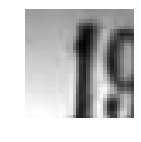

Label :1


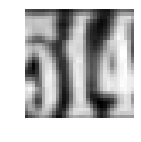

Label :1


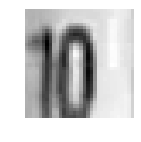

Label :0


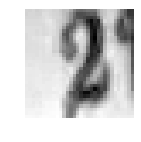

Label :2


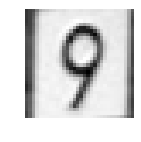

Label :9


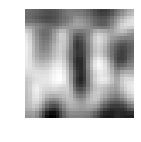

Label :0


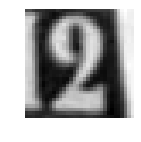

Label :2


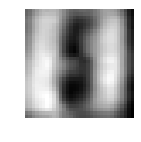

Label :5


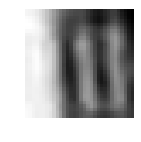

Label :1


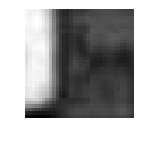

Label :3


In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
# Visualizing the first 10 images in the dataset and their labels

for i in range(30,40):
  plt.figure(figsize=(2,2))
  img = X_train[i].reshape(32,32)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.show()  
  print("Label :{}".format(y_train_label[i]))

###Build the Neural Network Model in Keras

In [0]:
# define the train and test loops and return score
def train_and_test_loop(iterations, lr, Lambda,verb=True):
    ## Define hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 64
    output_nodes = 10
   
    # Build the building blocks : Hidden layers, output layers, activation functions, optimizers
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(hidden_nodes, activation='relu'))
    model.add(tf.keras.layers.Dense(output_nodes, activation='softmax'))
    sgd = tf.keras.optimizers.SGD(lr=lr,decay=Lambda, momentum=0.9)
      
    # Compile the model
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
  
    # Fit the model
    model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=iterations, batch_size=256,verbose=verb)
    
    return model

    
def train_and_test_loop1(iterations, lr, Lambda, verb=True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 64
    output_nodes = 10

    #Build the building blocks : Hidden layers, output layers, activation functions, optimizers
    model = tf.keras.models.Sequential()    
    model.add(tf.keras.layers.Dense(hidden_nodes, activation='relu'))
    model.add(tf.keras.layers.Dense(output_nodes, activation='softmax'))
    sgd = tf.keras.optimizers.SGD(lr=lr,decay=Lambda,momentum=0.9)

    
    # Compile the model
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=iterations, batch_size=256,verbose=verb)
    
    # Calculate score and return score
    score = model.evaluate(X_val,y_val, verbose=0)
    
    return score

### Babysitting the learning process. Complete all the steps below to optimize your model 

### Step 1: Double Check that the loss is reasonable : Disable the regularization

In [7]:
# Set the hyperparameters
lr = 0.01
Lambda = 0
# Call the train and test function
train_and_test_loop1(iterations=1, lr=lr,Lambda=Lambda, verb=True)

Train on 42000 samples, validate on 18000 samples
42000/42000 [==============================] - 1s 23us/sample - loss: 2.3033 - acc: 0.1256 - val_loss: 2.2790 - val_acc: 0.1656


[2.2789849965837266, 0.16555555]

Is the loss range correct?? What about accuracy, does it make sense for an untrained network?

**Observation **: Loss and accuracy makes sense for an untrained network

### Step 2: Now, lets crank up the Lambda(Regularization)and check what it does to our loss function.

In [10]:
# Set the hyperparameters (Crank up the lambda value)
lr = 0.01
Lambda = 0.9
# Call the train and test function
train_and_test_loop(iterations=10, lr=lr,Lambda=Lambda)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 1s 24us/sample - loss: 2.3551 - acc: 0.1026 - val_loss: 2.3225 - val_acc: 0.1072
Epoch 2/10
42000/42000 [==============================] - 1s 20us/sample - loss: 2.3205 - acc: 0.1054 - val_loss: 2.3169 - val_acc: 0.1051
Epoch 3/10
42000/42000 [==============================] - 1s 20us/sample - loss: 2.3165 - acc: 0.1035 - val_loss: 2.3147 - val_acc: 0.1039
Epoch 4/10
42000/42000 [==============================] - 1s 20us/sample - loss: 2.3146 - acc: 0.1033 - val_loss: 2.3135 - val_acc: 0.1043
Epoch 5/10
42000/42000 [==============================] - 1s 20us/sample - loss: 2.3134 - acc: 0.1030 - val_loss: 2.3126 - val_acc: 0.1044
Epoch 6/10
42000/42000 [==============================] - 1s 20us/sample - loss: 2.3126 - acc: 0.1022 - val_loss: 2.3120 - val_acc: 0.1043
Epoch 7/10
42000/42000 [==============================] - 1s 20us/sample - loss: 2.3120 - acc: 0.1029 - val_loss: 2.

 **Observation**: Loss value increased as compared to Loss value of 1st epoch of previous model

### Step 3: Now, lets overfit to a small subset of our dataset, in this case 20 images.

In [0]:
X_train_subset = X_train[30:50,]
y_train_subset = y_train[30:50,]

X_train = X_train_subset
y_train = y_train_subset

In [24]:
# Print the X_train shape
X_train.shape

(20, 1024)

In [25]:
# Print the y_train shape
y_train.shape

(20, 10)

### Tip: Make sure that you can overfit very small portion of the training data
So, set a small learning rate and turn regularization off

In the code below:
- Take the first 20 examples from SVHN
- turn off regularization(reg=0.0)
- use simple vanilla 'sgd'

In [27]:
# Set hyperparameters for Overfitting
lr = 0.02
Lambda = 0

#call the train and test function (run it for sufficient epochs until the accuracy is going to 100%)
train_and_test_loop(iterations=200, lr=lr,Lambda=Lambda)

Train on 20 samples, validate on 18000 samples
Epoch 1/200
20/20 [==============================] - 1s 29ms/sample - loss: 2.4309 - acc: 0.1000 - val_loss: 2.3865 - val_acc: 0.1057
Epoch 2/200
20/20 [==============================] - 0s 9ms/sample - loss: 2.2502 - acc: 0.2500 - val_loss: 2.4061 - val_acc: 0.1007
Epoch 3/200
20/20 [==============================] - 0s 10ms/sample - loss: 2.1026 - acc: 0.2000 - val_loss: 2.4793 - val_acc: 0.1001
Epoch 4/200
20/20 [==============================] - 0s 9ms/sample - loss: 2.0252 - acc: 0.2000 - val_loss: 2.5614 - val_acc: 0.0989
Epoch 5/200
20/20 [==============================] - 0s 9ms/sample - loss: 1.9973 - acc: 0.3000 - val_loss: 2.6343 - val_acc: 0.0994
Epoch 6/200
20/20 [==============================] - 0s 9ms/sample - loss: 1.9696 - acc: 0.3500 - val_loss: 2.6685 - val_acc: 0.0996
Epoch 7/200
20/20 [==============================] - 0s 10ms/sample - loss: 1.9179 - acc: 0.3000 - val_loss: 2.6485 - val_acc: 0.1006
Epoch 8/200
20/20 [


Very small loss,  train accuracy going to 100, nice! We are successful in overfitting. If your accuracy is not 100%, then tweak the hyperparameters and epoch values.

**Observation**: Can see that model is overfitting since validation loss is much larger than training loss

### Loading the original dataset again

In [28]:
# Loading the original dataset
import h5py
import numpy as np

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/DLCP/Project-1/Data/SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_val = h5f['X_test'][:]
y_val = h5f['y_test'][:]

# Close this file(call the close function)
h5f.close()

#Flatten the images 
X_train = X_train.reshape(X_train.shape[0],1024)
X_val = X_val.reshape(X_val.shape[0],1024)

# # normalize inputs from 0-255 to 0-1
X_train /= 255.0
X_val /= 255.0

# convert class vectors to binary class matrices for keras
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

#Print the training and vallidation sets 
print("X_train",X_train.shape,"X_val :",X_val.shape)
print("y_train",y_train.shape,"y_val :",y_val.shape)


X_train (42000, 1024) X_val : (18000, 1024)
y_train (42000, 10) y_val : (18000, 10)


###Step 4: Start with small regularization and find learning rate that makes the loss go down.

- we start with Lambda(small regularization) = 1e-7
- we start with a small learning rate =1e-7

In [30]:
#set the hyperparameters according to the above instructions
lr = 1e-7
Lambda = 1e-7
iterations = 50
#call the train and test function
train_and_test_loop1(iterations=iterations, lr=lr,Lambda=Lambda)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 1s 31us/sample - loss: 2.4769 - acc: 0.1039 - val_loss: 2.4739 - val_acc: 0.1018
Epoch 2/50
42000/42000 [==============================] - 1s 21us/sample - loss: 2.4754 - acc: 0.1039 - val_loss: 2.4723 - val_acc: 0.1018
Epoch 3/50
42000/42000 [==============================] - 1s 21us/sample - loss: 2.4739 - acc: 0.1039 - val_loss: 2.4709 - val_acc: 0.1019
Epoch 4/50
42000/42000 [==============================] - 1s 21us/sample - loss: 2.4724 - acc: 0.1040 - val_loss: 2.4694 - val_acc: 0.1019
Epoch 5/50
42000/42000 [==============================] - 1s 21us/sample - loss: 2.4709 - acc: 0.1041 - val_loss: 2.4680 - val_acc: 0.1020
Epoch 6/50
42000/42000 [==============================] - 1s 21us/sample - loss: 2.4695 - acc: 0.1040 - val_loss: 2.4665 - val_acc: 0.1019
Epoch 7/50
42000/42000 [==============================] - 1s 22us/sample - loss: 2.4681 - acc: 0.1041 - val_loss: 2.

[2.4168695822821724, 0.10244445]

####Please document your findings of the results of the above step


**Observation** : Loss decreases steadily with every epoch

### Step 5: Okay now lets try a (larger) learning rate . What could possibly go wrong?

- Learning rate lr  
- Regularization lambda 


In [29]:
# Set Hyperparameters( High value for lr and low values for lambda)
lr = 1
Lambda = 0
iterations = 50
# Call the train and test function
train_and_test_loop1(iterations=iterations, lr=lr,Lambda=Lambda)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 1s 32us/sample - loss: 14.3768 - acc: 0.0996 - val_loss: 14.4955 - val_acc: 0.1007
Epoch 2/50
42000/42000 [==============================] - 1s 21us/sample - loss: 14.5109 - acc: 0.0997 - val_loss: 14.4955 - val_acc: 0.1007
Epoch 3/50
42000/42000 [==============================] - 1s 21us/sample - loss: 14.5109 - acc: 0.0997 - val_loss: 14.4955 - val_acc: 0.1007
Epoch 4/50
42000/42000 [==============================] - 1s 21us/sample - loss: 14.5109 - acc: 0.0997 - val_loss: 14.4955 - val_acc: 0.1007
Epoch 5/50
42000/42000 [==============================] - 1s 21us/sample - loss: 14.5109 - acc: 0.0997 - val_loss: 14.4955 - val_acc: 0.1007
Epoch 6/50
42000/42000 [==============================] - 1s 21us/sample - loss: 14.5109 - acc: 0.0997 - val_loss: 14.4955 - val_acc: 0.1007
Epoch 7/50
42000/42000 [==============================] - 1s 21us/sample - loss: 14.5109 - acc: 0.0997 -

[14.495540306939018, 0.100666665]

####Please document your findings of the results of the above step

**Observations:**
The loss went quite high at once and then remains constant. Thus very poor accuracy as well.




### Step 6: Train the model for different learning rates (In a range) based on the learning from above steps

- learning rate =
- regularization remains the small, lambda 

In [31]:
lr = 0.01
Lambda = 0.09
train_and_test_loop(iterations=10, lr=lr,Lambda=Lambda)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 1s 33us/sample - loss: 2.3002 - acc: 0.1156 - val_loss: 2.2916 - val_acc: 0.1252
Epoch 2/10
42000/42000 [==============================] - 1s 22us/sample - loss: 2.2894 - acc: 0.1310 - val_loss: 2.2872 - val_acc: 0.1376
Epoch 3/10
42000/42000 [==============================] - 1s 22us/sample - loss: 2.2866 - acc: 0.1367 - val_loss: 2.2850 - val_acc: 0.1420
Epoch 4/10
42000/42000 [==============================] - 1s 22us/sample - loss: 2.2849 - acc: 0.1423 - val_loss: 2.2834 - val_acc: 0.1461
Epoch 5/10
42000/42000 [==============================] - 1s 22us/sample - loss: 2.2835 - acc: 0.1461 - val_loss: 2.2822 - val_acc: 0.1492
Epoch 6/10
42000/42000 [==============================] - 1s 22us/sample - loss: 2.2824 - acc: 0.1491 - val_loss: 2.2811 - val_acc: 0.1525
Epoch 7/10
42000/42000 [==============================] - 1s 22us/sample - loss: 2.2814 - acc: 0.1507 - val_loss: 2.

#### Document the findings of the above step here

**Observation:** Loss value decreases steadily with each epoch 

### Hyperparameter Optimization

### Cross validation Strategy


- Do coarse -> fine cross-validation in stages

- First stage: only a few epochs to get rough idea of what params work
- Second stage: longer running time, finer search
- … (repeat as necessary)

### Tip for detecting explosions in the solver: 
- If the cost is ever > 3 * original cost, break out early




### For example: Run coarse search for 10 times with different lr and Lambda values each with 100 epochs.

In [32]:
%%time
#Run coarse search for a coarse range of lr and lambda values and print the results of the 
#first 10 epochs and figure out the range of lr and lambda for finer search
import math
import numpy as np
for k in range(1,100):
    lr = math.pow(10, np.random.uniform(-7.0, 4.0))
    Lambda = math.pow(10, np.random.uniform(-5,5))
    best_acc = train_and_test_loop1(50, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Try 1/100: Best_val_acc: [2.3504764711591934, 0.09988889], lr: 6.26064345493644e-07, Lambda: 0.0001173982461032458

Try 2/100: Best_val_acc: [2.438791547139486, 0.09466667], lr: 1.5630889480893977e-05, Lambda: 41465.0754490548

Try 3/100: Best_val_acc: [2.307356251186795, 0.105444446], lr: 1.3968393804216391e-05, Lambda: 7.332681822779288e-05

Try 4/100: Best_val_acc: [2.3068348443773057, 0.10744444], lr: 0.017395640772399867, Lambda: 3.833879204000732

Try 5/100: Best_val_acc: [2.327018688201904, 0.097555555], lr: 0.0004441412599233238, Lambda: 0.5369746545192623

Try 6/100: Best_val_acc: [14.48121312544081, 0.101555556], lr: 485.3515104056453, Lambda: 1.0834253954136592

Try 7/100: Best_val_acc: [2.382926646762424, 0.09544444], lr: 3.5665930938998705e-07, Lambda: 2.1823874395519594e-05

Try 8/100: Best_val_acc: [14.49374937608507, 0.100777775], lr: 138.7276897140009, Lambda: 10082.129276201553

Try 9/100: Best_val_acc: [0.9164918349054124, 0.7298889], lr: 0.01316066623707063, Lambda:

#### Document the findings of the above step here:

Lr and Lambda values of lower value of losses 


*  Try 9/100: Best_val_acc: [0.9164918349054124, 0.7298889], lr: 0.01316066623707063, Lambda: 0.0007307102224816126
*  Try 71/100: Best_val_acc: [1.226083343029022, 0.63255554], lr: 0.034867874202522374, Lambda: 3.70805755687879e-05
*  Try 80/100: Best_val_acc: [1.354048510869344, 0.63566667], lr: 0.0024952266715698402, Lambda: 0.0005776704791374289
*   Try 97/100: Best_val_acc: [2.48391950141059, 0.09427778], lr: 1.8447440535510731e-07, Lambda: 0.006975983861897691



### Now run finer search

In [15]:
#Set a finer range of hyperparameters and figure out even finer range
import math
import numpy as np
for k in range(1,21):
    lr = math.pow(10, np.random.uniform(-4.0, -2.0))
    Lambda = math.pow(10, np.random.uniform(-5,2))
    best_acc = train_and_test_loop1(50, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Try 1/10: Best_val_acc: [2.2950189656151667, 0.11727778], lr: 0.002822577899961329, Lambda: 0.060372754203027505

Try 2/10: Best_val_acc: [2.2959940656026205, 0.119055554], lr: 0.0010201289357660945, Lambda: 0.02220768040229958

Try 3/10: Best_val_acc: [2.299281034257677, 0.119722225], lr: 0.004332381369473413, Lambda: 0.20465657688084754

Try 4/10: Best_val_acc: [2.286019015206231, 0.14422221], lr: 0.0047699584588865975, Lambda: 0.07068064800428157

Try 5/10: Best_val_acc: [2.3265166318681505, 0.10783333], lr: 0.0003069292602075098, Lambda: 0.19885768485344102

Try 6/10: Best_val_acc: [2.2994270464579265, 0.11027778], lr: 0.0006067317531516788, Lambda: 0.016402861798493068

Try 7/10: Best_val_acc: [2.408142639160156, 0.09811111], lr: 0.000622998331084552, Lambda: 62.81732078898682

Try 8/10: Best_val_acc: [2.3046938179863825, 0.1015], lr: 0.0013107111035187094, Lambda: 0.21748147027231413

Try 9/10: Best_val_acc: [2.3022810433705647, 0.119], lr: 0.005846415604923866, Lambda: 0.7210085

#### Document the findings of the above step here:



1.   Try 14/10: Best_val_acc: [1.3608835085762871, 0.62905556], lr: 0.0035783917560449252, Lambda: 0.0009451414897428412
2.   Try 18/10: Best_val_acc: [1.2011000037723116, 0.66283333], lr: 0.0013141042411601146, Lambda: 1.4401944388135805e-05

3.  Try 19/10: Best_val_acc: [1.1031953185929193, 0.68516666], lr: 0.004616889426377866, Lambda: 0.0005352990844022703
*   Try 9/100: Best_val_acc: [0.9164918349054124, 0.7298889], lr: 0.01316066623707063, Lambda: 0.0007307102224816126









### Running deep with the best possible lr and lambda and report the accuracy 

In [36]:
# Set the best hyperparameters found in the previous steps
lr = 0.01
Lambda = 0.0003
iterations = 2000

# Call the train and test function (with score)
train_and_test_loop1(iterations, lr, Lambda)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2000
42000/42000 [==============================] - 3s 70us/sample - loss: 2.2959 - acc: 0.1291 - val_loss: 2.2711 - val_acc: 0.1784
Epoch 2/2000
42000/42000 [==============================] - 1s 25us/sample - loss: 2.2304 - acc: 0.2150 - val_loss: 2.1633 - val_acc: 0.2856
Epoch 3/2000
42000/42000 [==============================] - 1s 25us/sample - loss: 2.0833 - acc: 0.3164 - val_loss: 1.9879 - val_acc: 0.3377
Epoch 4/2000
42000/42000 [==============================] - 1s 25us/sample - loss: 1.8949 - acc: 0.4002 - val_loss: 1.7872 - val_acc: 0.4572
Epoch 5/2000
42000/42000 [==============================] - 1s 25us/sample - loss: 1.7084 - acc: 0.4885 - val_loss: 1.6271 - val_acc: 0.5227
Epoch 6/2000
42000/42000 [==============================] - 1s 25us/sample - loss: 1.5533 - acc: 0.5499 - val_loss: 1.4710 - val_acc: 0.5863
Epoch 7/2000
42000/42000 [==============================] - 1s 25us/sample - loss: 1.4397 - acc: 0.5865 

[0.6941773838996887, 0.81244445]